## Erreur inverse - Cas symétrique


Soient $A\in \mathcal{S}_n(\mathbb{R})$ inversible, $b\in\mathbb{R}^n$ et $x\in\mathbb{R}^n$ solution de $$Ax=b.$$

On dispose d'un algorithme permettant la résolution numérique d'un tel problème. L'exécution de celui-ci conduit à une solution numérique $\tilde{x}$, entachée d'erreurs : $$A\tilde{x}\neq b. $$

L'erreur inverse de cet algorithme, en norme de Frobenius, peut être obtenue depuis la solution du problème d'optimisation suivant : $$\min_{\Delta \in \mathcal{C}} \Vert \Delta \Vert^2_F,$$

avec $$\mathcal{C}=\left\{ \Delta \in \mathcal{S}_n(\mathbb{R}) \mbox{ t.q. } (A+\Delta)\tilde{x}=b\right\}.$$

On s'intéresse à un problème plus simple qui consiste à chercher un élément de $\mathcal{C}$, si ce dernier n'est pas vide :

$$\hspace{5cm} (\mathcal{E})\quad \mbox{ Trouver }\Delta \in \mathcal{S}_n(\mathbb{R}) \mbox{ t.q. } (A+\Delta)\tilde{x}=b.$$

En écrivant $$\mathcal{C}=\mathcal{C}_1\bigcap\mathcal{C}_2,$$ avec $$\mathcal{C}_1=\mathcal{S}_n(\mathbb{R}), \quad \mathcal{C}_2=\left\{\Delta \in \mathcal{M}_n(\mathbb{R}) \mbox{ t.q. } (A+\Delta)\tilde{x}=b\right\},$$ on est amenés à chercher un élément sur l'intersection de deux convexes fermés non vides.

**Question 1 :** Justifier que ces deux parties sont convexes, fermées et non vides.
Ce sont des espaces vectoriels donc forcement convexes. Il existe une matrice semi définies positives dans R et R+ fermé de R.

On définit pour cela le problème d'optimisation suivant : 
$$\hspace{5cm} (\mathcal{P})\quad \min_{\Delta \in \mathcal{M}_n(\mathbb{R})} f(\Delta)=\max(d(\Delta,\mathcal{C}_1),d(\Delta,\mathcal{C}_2))$$

avec $d(\Delta,\mathcal{C}_i)$ la distance de $\Delta$ à $\mathcal{C}_i$.

**Question 2 :** On choisit de munir $\mathcal{M}_n(\mathbb{R})$ du produit scalaire $<X,Y>=tr(XY^T)$. On a alors $d(\Delta,\mathcal{C}_i)=\Vert \Delta - \Pi_{\mathcal{C}_i}(\Delta)\Vert_F$, avec $\Vert \Vert_F$ la norme de Frobenius, et $\Pi_{\mathcal{C}_i}(\Delta)$ le projeté de $\Delta$ sur $\mathcal{C}_i$. Donner l'expression analytique des $\Pi_{\mathcal{C}_i}(\Delta)$.


cf feuille

**Question 3 :** Proposer un sous-gradient de $f$ en $\Delta$, $\forall \Delta \in \mathcal{C}$.

In [18]:
function PIC1(P, D)
    return (X + transpose(X))/2
end

PIC1 (generic function with 1 method)

In [19]:
function PIC2(X, x_tilde, A, b)
    return (X*(I - x_tilde*transpose(x_tilde)/norm(x_tilde)^2) + ((b-A*x_tilde)*transpose(x_tilde)/norm(x_tilde)^2))
end

PIC2 (generic function with 1 method)

In [20]:
function ss_gradient(X, x_tilde, b, A)
    dC1 = X - PIC1(X)
    dC2 = X - PIC2(X, x_tilde, A, b)
    if tr(dC1*dC1') < tr(dC2*dC2')
        return dC2/tr(dC2*transpose(dC2))
    else
        return dC1/tr(dC1*transpose(dC1))
    end
end

ss_gradient (generic function with 1 method)

In [21]:
function eval_f(X, x_tilde, A, b)
    dC1 = X - PIC1(X)
    dC2 = X - PIC2(X, x_tilde, A, b)
    return max(tr(dC1*dC1'), tr(dC2*dC2'))
end

eval_f (generic function with 1 method)


**Qestion 4 :** Résoudre le problème $ (\mathcal{P})$ par l'algorithme du sous-gradient.


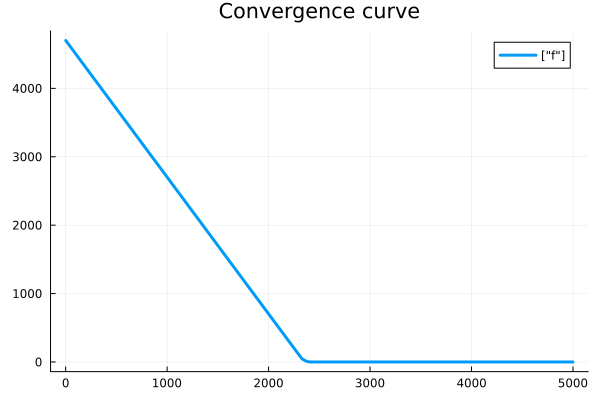

In [29]:
#Pkg.add("Plots")
using Plots
import LinearAlgebra
using LinearAlgebra
#Initialisation
n=100;
M = randn(n,n);
A = (M + M')/2;
#A = A*A';
sigma = 0.5;
X_true = randn(n,n);
X_true = sigma^2*(X_true + X_true')/2;
x_tilde = randn(n);
b = (A + X_true)*x_tilde;
xbest=x_tilde;

X = randn(n,n);
i = 0;
fbest =100000; # $f_{best}^0$
histo =[];# Suite des itérés f_{best}^k
pas = 1
 #par defaut on va mettre 10-2
itermax=5000;

xp=x_tilde;
while i < itermax
    i = i + 1;
    # Insérer votre code
    #println(eval_f(X, xp, A, b))
    if eval_f(X, xp, A, b) < fbest
        fbest = eval_f(X, xp, A, b)
        xbest = X
    end
    #pas = eval_f(X, xp, A, b)/norm(ss_gradient(X, xp, b, A))^2
    X = X - pas*ss_gradient(X, xp, b, A)
    
    # Stockage
    append!( histo, fbest)
end
#Affichage des courbes de convergence
#plotly();
iter=1:itermax;
plot(iter,histo,title="Convergence curve",label=["f"],lw=3)
# println(histo)